In [13]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [14]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Entropy/CSV/Gray.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-14-99be61066188>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-14-99be61066188>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.837496,0.804884,0.694754,0.589248,0.553841,0.488336,0.479846,0.475680,0.449786,0.442280,...,0.652707,0.718388,0.768566,0.950411,0.796984,0.582206,0.525445,0.584897,0.688710,1
1,0.853356,0.701616,0.622520,0.596695,0.572790,0.581854,0.542538,0.505265,0.582676,0.594674,...,0.823329,0.734343,0.623506,0.785815,0.982154,0.754361,0.674094,0.669100,0.676406,1
2,1.894732,1.719272,1.599109,1.695362,1.768130,1.618208,1.629891,1.652598,1.667379,1.837525,...,1.744755,1.765632,1.989923,1.960546,1.974459,1.815624,1.712046,1.693183,1.916792,1
3,0.834748,0.863627,1.048542,1.211608,0.989584,1.078015,1.176071,1.007625,1.029429,1.193712,...,0.010256,0.010256,0.010256,0.006706,0.098830,0.072594,0.019535,0.022793,0.023419,1
4,1.628894,1.385916,1.244579,1.119788,1.341178,1.461674,1.347787,1.686546,1.538704,1.465947,...,1.843316,1.598068,1.617885,1.854822,1.164702,1.196274,1.517541,1.126891,1.075529,1


In [15]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

In [16]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8571428571428571
              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       142
           1       0.54      0.58      0.56        26

    accuracy                           0.86       168
   macro avg       0.73      0.74      0.74       168
weighted avg       0.86      0.86      0.86       168



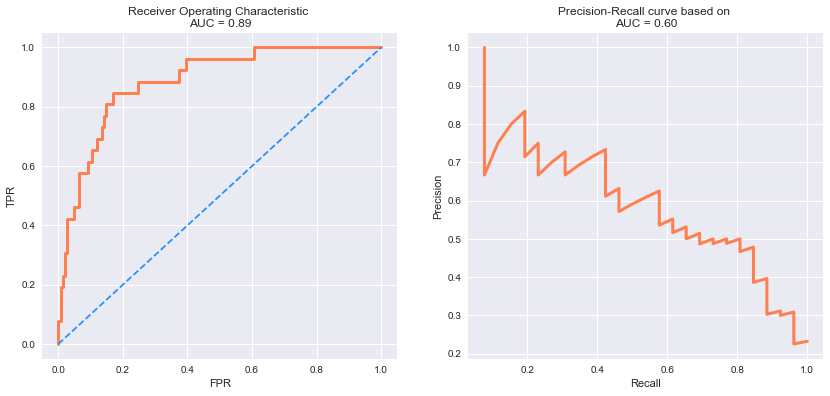

In [17]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()